# Fit measurement

Import the required modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data generation

The data is a damped linear oscillator with noise, described by
$S(t) = A + B \cos(2\pi f t + \phi) \exp(-\alpha t) + \eta(t)$.

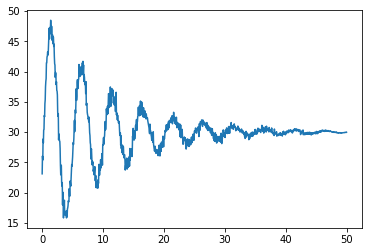

In [14]:
t = np.linspace(0.0, 50.0, 1001)
y = 30.0 + 20.0*np.cos(2*np.pi*(0.2*t - 0.3))*np.exp(-0.1*t) + \
    (1.01 - t/t[-1])*np.random.normal(size=t.size)
plt.plot(t, y);

Save the data to the file `signal.csv`.

In [27]:
data = np.vstack([t, y]).T
np.savetxt('signal.csv', data,
           delimiter=',',
           header='t, signal')

## Data fitting

The data is in a CSV file, and there is a single header row, which we want to skip.

In [29]:
data = np.genfromtxt('signal.csv', delimiter=',', skip_header=1)

For convenience, we assign the two columns to the variables `t` and `signal`.

In [33]:
t, signal = data[:, 0], data[:, 1]

Plot the data to get some idea of its properties.

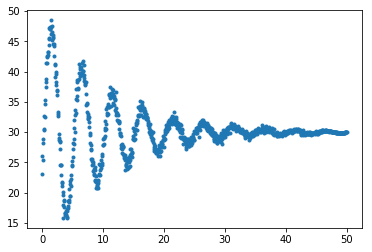

In [34]:
plt.plot(t, signal, '.');

The theoretical model is $S(t) = A + B \cos(2\pi (f t + \phi)) \exp(-\alpha t)$.  Find values for the parameters $A$, $B$, $f$, $\phi$, and $\alpha$ that fit the signal best.

Define a function in `t`, with parameters `A`, `B`, `f`, `phi`, and `alpha` as in the theoretical model.

In [47]:
def signal_func(t, A, B, f, phi, alpha):
    return A + B*np.cos(2.0*np.pi*(f*t + phi))*np.exp(-alpha*t)

Import the required module for curve fitting.

In [36]:
from scipy.optimize import curve_fit

Perform the curve fit, and show the optimal values for the parameters as determined by the algorithm.

In [48]:
p_opt, p_cov = curve_fit(signal_func, t, signal)
p_opt

/home/gjb/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([ 29.98801224,  19.87009637,  -0.19984945,   0.29908005,   0.09850725])

Plot the measured signal, and the fitted curve.

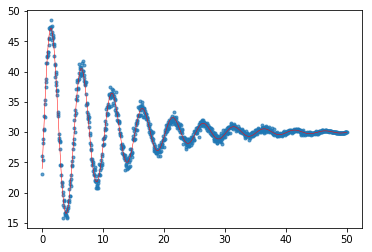

In [49]:
plt.plot(t, signal, '.', alpha=0.7)
plt.plot(t, signal_func(t, *p_opt), 'r', linewidth=0.5);